# Comparison of different training datasets for scGEN


In [1]:
import gc
import pandas as pd
import pertpy as pt
import scanpy as sc
import seaborn as sns

import matplotlib.pyplot as plt

from scvi._settings import ScviConfig
import anndata as ad

config = ScviConfig()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


## Load data

`pt.dt.hagai_2018` is a scRNA-seq data set by Hagai et al. comprised of bone marrow-derived mononuclear phagocytes from mouse, rat, rabbit and pig perturbed with lipopolysaccharide (LPS) for six hours. `scGen` has been applied on this dataset to show its capability to predict single-cell perturbation across species.


In [2]:
adata = pt.dt.hagai_2018()

In [3]:
pd.crosstab(adata.obs.condition, adata.obs.species)

species,mouse,pig,rabbit,rat
condition,,,,
LPS6,9310,6031,8930,11743
unst,9515,10587,11088,10438


## Train models

Try to predict rat LPS6 from rat control given different training datasets that contain the three other individual species.


In [4]:
pred = dict()
for train_species in set(adata.obs.species.unique()) - set(["rat"]):
    print("\n", train_species)
    adata_sub = adata[
        ((adata.obs.species == "rat").values & (adata.obs.condition == "unst").values)
        | (adata.obs.species == train_species),
        :,
    ].copy()
    display(pd.crosstab(adata_sub.obs.condition, adata_sub.obs.species))
    pt.tl.Scgen.setup_anndata(adata_sub, batch_key="condition", labels_key="species")
    for i in range(3):
        config.seed = i
        scgen_model = pt.tl.Scgen(adata_sub)
        scgen_model.train(max_epochs=100, accelerator="auto")
        scgen_model.save(f"model_{train_species}_{i}.pt", overwrite=True)
        pred[train_species + "_" + str(i)] = scgen_model.predict(
            ctrl_key="unst", stim_key="LPS6", celltype_to_predict="rat"
        )[0]
        pred[train_species + "_" + str(i)].write(f"pred_{train_species}_{i}.h5ad")
        gc.collect()


 mouse


species,mouse,rat
condition,,
LPS6,9310,0
unst,9515,10438


Seed set to 0


INFO     Jax module moved to TFRT_CPU_0.Note: Pytorch lightning will show GPU is not being used for the Trainer.   


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 1/100:   0%|          | 0/100 [00:00<?, ?it/s]

/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:385: You have overridden `transfer_batch_to_device` in `LightningModule` but have passed in a `LightningDataModule`. It will use the implementation from `LightningModule` instance.


Epoch 100/100: 100%|██████████| 100/100 [22:17<00:00, 13.41s/it, v_num=1, train_loss_step=2.36e+4, train_loss_epoch=3.2e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [22:17<00:00, 13.37s/it, v_num=1, train_loss_step=2.36e+4, train_loss_epoch=3.2e+4]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Seed set to 1


INFO     Jax module moved to TFRT_CPU_0.Note: Pytorch lightning will show GPU is not being used for the Trainer.   


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 100/100: 100%|██████████| 100/100 [22:26<00:00, 13.42s/it, v_num=1, train_loss_step=2.64e+4, train_loss_epoch=3.19e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [22:26<00:00, 13.46s/it, v_num=1, train_loss_step=2.64e+4, train_loss_epoch=3.19e+4]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Seed set to 2


INFO     Jax module moved to TFRT_CPU_0.Note: Pytorch lightning will show GPU is not being used for the Trainer.   


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 100/100: 100%|██████████| 100/100 [22:07<00:00, 13.22s/it, v_num=1, train_loss_step=2.45e+4, train_loss_epoch=3.2e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [22:07<00:00, 13.27s/it, v_num=1, train_loss_step=2.45e+4, train_loss_epoch=3.2e+4]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             

 rabbit


species,rabbit,rat
condition,,
LPS6,8930,0
unst,11088,10438


Seed set to 0


INFO     Jax module moved to TFRT_CPU_0.Note: Pytorch lightning will show GPU is not being used for the Trainer.   


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 100/100: 100%|██████████| 100/100 [22:48<00:00, 13.67s/it, v_num=1, train_loss_step=5.46e+3, train_loss_epoch=3.38e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [22:48<00:00, 13.69s/it, v_num=1, train_loss_step=5.46e+3, train_loss_epoch=3.38e+4]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Seed set to 1


INFO     Jax module moved to TFRT_CPU_0.Note: Pytorch lightning will show GPU is not being used for the Trainer.   


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 100/100: 100%|██████████| 100/100 [23:02<00:00, 13.79s/it, v_num=1, train_loss_step=5.05e+3, train_loss_epoch=3.38e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [23:02<00:00, 13.83s/it, v_num=1, train_loss_step=5.05e+3, train_loss_epoch=3.38e+4]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Seed set to 2


INFO     Jax module moved to TFRT_CPU_0.Note: Pytorch lightning will show GPU is not being used for the Trainer.   


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 100/100: 100%|██████████| 100/100 [22:58<00:00, 13.79s/it, v_num=1, train_loss_step=5.15e+3, train_loss_epoch=3.38e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [22:58<00:00, 13.78s/it, v_num=1, train_loss_step=5.15e+3, train_loss_epoch=3.38e+4]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             

 pig


species,pig,rat
condition,,
LPS6,6031,0
unst,10587,10438


Seed set to 0


INFO     Jax module moved to TFRT_CPU_0.Note: Pytorch lightning will show GPU is not being used for the Trainer.   


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 100/100: 100%|██████████| 100/100 [20:12<00:00, 12.09s/it, v_num=1, train_loss_step=5.86e+3, train_loss_epoch=2.6e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [20:12<00:00, 12.13s/it, v_num=1, train_loss_step=5.86e+3, train_loss_epoch=2.6e+4]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Seed set to 1


INFO     Jax module moved to TFRT_CPU_0.Note: Pytorch lightning will show GPU is not being used for the Trainer.   


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 100/100: 100%|██████████| 100/100 [20:32<00:00, 12.28s/it, v_num=1, train_loss_step=6.11e+3, train_loss_epoch=2.6e+4]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [20:32<00:00, 12.33s/it, v_num=1, train_loss_step=6.11e+3, train_loss_epoch=2.6e+4]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


Seed set to 2


INFO     Jax module moved to TFRT_CPU_0.Note: Pytorch lightning will show GPU is not being used for the Trainer.   


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 100/100: 100%|██████████| 100/100 [20:33<00:00, 12.33s/it, v_num=1, train_loss_step=5.8e+3, train_loss_epoch=2.6e+4] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [20:33<00:00, 12.34s/it, v_num=1, train_loss_step=5.8e+3, train_loss_epoch=2.6e+4]
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


## Metrics

Compute different metrics to evaluate prediction performance


In [5]:
# Compute metrics - not all used for plot for the paper
metrics = []
pt_degeval = pt.tl.DGEEVAL()
pt_distance = pt.tl.Distance(metric="euclidean")
for train_species, pred_adata in pred.items():
    train_species, seed = train_species.split("_")
    metrics_sub = {"train_species": train_species}
    target = adata[adata.obs.query('condition=="LPS6" & species=="rat"').index, :]
    target_X = target.X.toarray()
    reference = adata[adata.obs.query('condition=="unst" & species=="rat"').index, :]
    reference_X = reference.X.toarray()
    predict_X = pred_adata.X

    # distance metrics
    metrics_sub["dist_mean_target"] = pt_distance(target_X, predict_X)
    metrics_sub["dist_mean_ref"] = pt_distance(reference_X, predict_X)
    metrics_sub["dist_distnMeanVar"] = pt.tl.Distance(metric="mean_var_distribution")(
        target_X, predict_X
    )
    # compare differential gene expression between simlutaed perturbation v.s. control and real perturbation v.s. control
    adata_joint = ad.concat(
        (pred_adata, target, reference),
        label="label",
        keys=["predict", "target", "ctrl"],
        index_unique="-",
    )
    sc.tl.rank_genes_groups(
        adata_joint,
        groupby="label",
        groups=["predict"],
        reference="ctrl",
        key_added="de_predict",
        method="wilcoxon",
    )
    sc.tl.rank_genes_groups(
        adata_joint,
        groupby="label",
        groups=["target"],
        reference="ctrl",
        key_added="de_target",
        method="wilcoxon",
    )
    de_result = pt_degeval.compare(
        adata_joint, de_key1="de_predict", de_key2="de_target", shared_top=100
    )
    metrics_sub["deg_shared"] = de_result["shared_top_genes"]
    metrics_sub["deg_corr"] = de_result["scores_corr"]
    metrics_sub["deg_ranks_corr"] = de_result["scores_ranks_corr"]

    metrics_sub["dist_mean_rel"] = pt_distance.compare_distance(
        pert=target_X, pred=predict_X, ctrl=reference_X, mode="scaled"
    )

    metrics.append(metrics_sub)
metrics = pd.DataFrame(metrics)
metrics.to_csv("metrics.tsv", sep="\t", index=False)

/opt/homebrew/Caskroom/miniforge/base/envs/pertpy_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/homebrew/Caskroom/miniforge/base/envs/pertpy_env/lib/python3.12/site-packages/scanpy/to

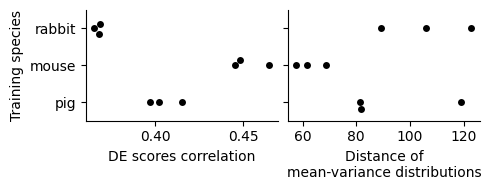

In [8]:
# Plot for the paper
cols = 2
fig, axs = plt.subplots(1, cols, figsize=(2.5 * cols, 2), sharey=True)
for idx, (metric, metric_name) in enumerate(
    [
        ("deg_ranks_corr", "DE scores correlation"),
        ("dist_distnMeanVar", "Distance of\nmean-variance distributions"),
    ]
):
    ax = axs[idx]
    sns.swarmplot(y="train_species", x=metric, data=metrics, ax=ax, c="k")
    ax.set_xlabel(metric_name)
    ax.set_ylabel("Training species")
    ax.set(facecolor=(0, 0, 0, 0))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

fig.tight_layout()
fig.set(facecolor=(0, 0, 0, 0))
plt.subplots_adjust(wspace=0.05)

path_fig = "figures/metrics-swarm"
plt.savefig(path_fig + ".pdf", dpi=300, bbox_inches="tight")
plt.savefig(path_fig + ".png", dpi=1200, bbox_inches="tight")